In [2]:
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt

In [1]:
import os
print(os.getcwd())  # Gets the current working directory of the notebook


C:\Users\91997


In [3]:
trainPath = r"D:\mega project work\archive (1)\OCT2017\train"
testPath = r"D:\mega project work\archive (1)\OCT2017\test"
batchSize = 32

In [4]:

model = Sequential()

model.add(Conv2D(filters=16, kernel_size=3, activation='relu', input_shape=(224, 224, 1)))  # 1 -> grayscale
model.add(MaxPooling2D())
model.add(Conv2D(filters=32, kernel_size=3, activation='relu'))
model.add(MaxPooling2D())

model.add(Flatten())
model.add(Dense(4, activation='softmax'))

print(model.summary())

model.compile(loss="categorical_crossentropy", optimizer="Adam", metrics=["accuracy"])


D:\anaconda\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 222, 222, 16)   │           160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 111, 111, 16)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 109, 109, 32)   │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 54, 54, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 93312)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 4)              │       373,252 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 378,052 (1.44 MB)

 Trainable params: 378,052 (1.44 MB)

 Non-trainable params: 0 (0.00 B)

None


In [5]:
datagen = ImageDataGenerator(rescale=1./255)

trainData = datagen.flow_from_directory(
    trainPath,
    target_size=(224, 224),
    batch_size=batchSize,
    color_mode='grayscale',
    class_mode='categorical',
    shuffle=True
)

testData = datagen.flow_from_directory(
    testPath,
    target_size=(224, 224),
    batch_size=batchSize,
    color_mode='grayscale',
    class_mode='categorical',
    shuffle=False
)

stepsPerEpoch = int(np.ceil(trainData.samples / batchSize))
validationSteps = int(np.ceil(testData.samples / batchSize))


Found 83484 images belonging to 4 classes.
Found 968 images belonging to 4 classes.


In [6]:
stopEarly = EarlyStopping(monitor='val_accuracy', patience=5)


In [7]:
history = model.fit(
    trainData,
    steps_per_epoch=stepsPerEpoch,
    epochs=50,
    validation_steps=validationSteps,
    validation_data=testData,
    callbacks=[stopEarly]
)

D:\anaconda\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/50
2609/2609 ━━━━━━━━━━━━━━━━━━━━ 1760s 673ms/step - accuracy: 0.6915 - loss: 0.8167 - val_accuracy: 0.7624 - val_loss: 0.5491
Epoch 2/50
2609/2609 ━━━━━━━━━━━━━━━━━━━━ 1421s 545ms/step - accuracy: 0.8548 - loss: 0.4125 - val_accuracy: 0.8171 - val_loss: 0.4395
Epoch 3/50
2609/2609 ━━━━━━━━━━━━━━━━━━━━ 1596s 612ms/step - accuracy: 0.9054 - loss: 0.2754 - val_accuracy: 0.8027 - val_loss: 0.4997
Epoch 4/50
2609/2609 ━━━━━━━━━━━━━━━━━━━━ 1442s 553ms/step - accuracy: 0.9410 - loss: 0.1801 - val_accuracy: 0.9390 - val_loss: 0.1936
Epoch 5/50
2609/2609 ━━━━━━━━━━━━━━━━━━━━ 1494s 573ms/step - accuracy: 0.9615 - loss: 0.1183 - val_accuracy: 0.9267 - val_loss: 0.2423
Epoch 6/50
2609/2609 ━━━━━━━━━━━━━━━━━━━━ 840s 322ms/step - accuracy: 0.9769 - loss: 0.0751 - val_accuracy: 0.9225 - val_loss: 0.2655
Epoch 7/50
2609/2609 ━━━━━━━━━━━━━━━━━━━━ 1176s 451ms/step - accuracy: 0.9838 - loss: 0.0569 - val_accuracy: 0.9070 - val_loss: 0.3506
Epoch 8/50
2609/2609 ━━━━━━━━━━━━━━━━━━━━ 1174s 450ms/st

In [8]:
model.save(r"D:\mega project work\retinalOCT_model.h5")

In [10]:
model.save(r"D:\mega project work\retinalOCT_model.keras")


In [11]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']


In [12]:

epochsForPlot = range(len(acc))


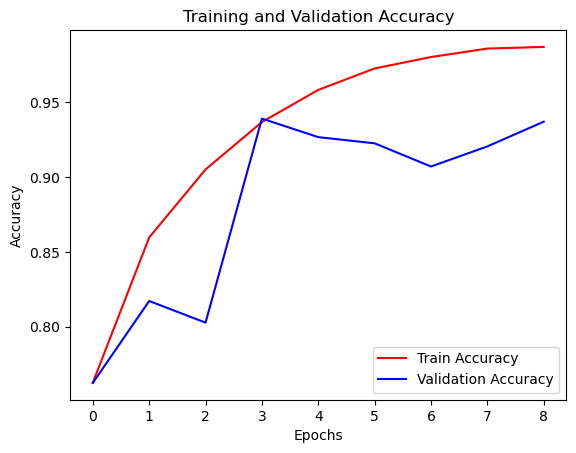

In [15]:
plt.plot(epochsForPlot, acc, 'r', label='Train Accuracy')
plt.plot(epochsForPlot, val_acc, 'b', label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend(loc='lower right')
plt.show()



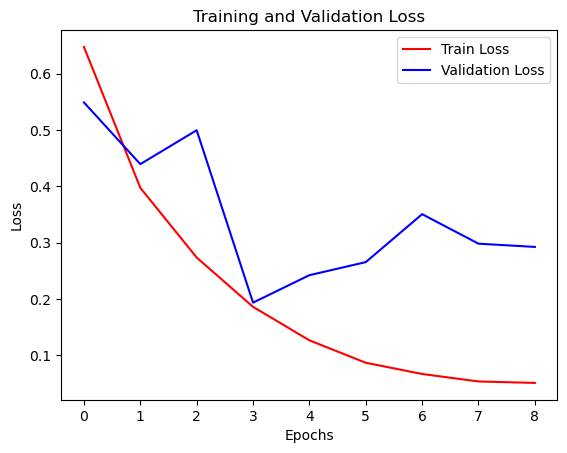

In [16]:
plt.plot(epochsForPlot, loss, 'r', label='Train Loss')
plt.plot(epochsForPlot, val_loss, 'b', label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend(loc='upper right')
plt.show()

